In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib.pyplot as plt

In [2]:
def getData(stockName,period,interval):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [3]:
getData('XU030.IS','30d','15m')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-08-14 09:45:00+03:00,8378.730469,8452.379883,8378.730469,8452.379883,8452.379883,0
2023-08-14 10:00:00+03:00,8452.379883,8483.919922,8428.400391,8483.690430,8483.690430,0
2023-08-14 10:15:00+03:00,8483.870117,8500.940430,8473.019531,8486.269531,8486.269531,0
2023-08-14 10:30:00+03:00,8485.190430,8500.929688,8468.589844,8486.669922,8486.669922,0
2023-08-14 10:45:00+03:00,8487.129883,8521.599609,8485.450195,8517.610352,8517.610352,0
...,...,...,...,...,...,...
2023-09-25 17:00:00+03:00,8700.290039,8711.139648,8687.910156,8699.450195,8699.450195,0
2023-09-25 17:15:00+03:00,8700.030273,8730.230469,8700.030273,8728.669922,8728.669922,0
2023-09-25 17:30:00+03:00,8728.139648,8733.740234,8714.299805,8726.730469,8726.730469,0


In [4]:
def calc(tick,per,inter):
    if inter=='1d':
        df=getData(tick,per,inter).reset_index().drop(columns=['Date','Close']).rename(columns={'Adj Close':'Close'})
    else:
        df=getData(tick,per,inter).reset_index().drop(columns=['Datetime','Close']).rename(columns={'Adj Close':'Close'})
    
    df['r_var']=df['Close'].rolling(30).var()
    df['Volatility']=np.sqrt(df['r_var'])
    df['Range']=np.sqrt(30/365)*df['Volatility']
    df['RH']=(df['Close']+df['Range']).shift(3)
    df['RL']=(df['Close']-df['Range']).shift(3)
    
    ax = df[['Close','RH','RL']][-60:].plot(figsize=(15,6))
    
    ax.get_lines()[0].set_color('yellow')  # Change the color of 'Value1' to red
    ax.get_lines()[1].set_color('green')
    ax.get_lines()[2].set_color('red')
    
    
    ax.set_title(f'{tick}-{inter}')
    ax.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.set_facecolor('#222222')
    ax.tick_params(axis='both', colors='black')
    ax.legend(loc='upper left')
    plt.savefig(f"{tick}-{inter}.png")

XU030.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
XU100.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
TOASO.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
KCHOL.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
PETKM.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
THYAO.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
BIMAS.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
FROTO.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
ASELS.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
TUPRS.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
SAHOL.IS 30d 15m
[*********************100%***********************]  1 of 1 completed
TCELL.IS 30d 15m
[*********************100%***********

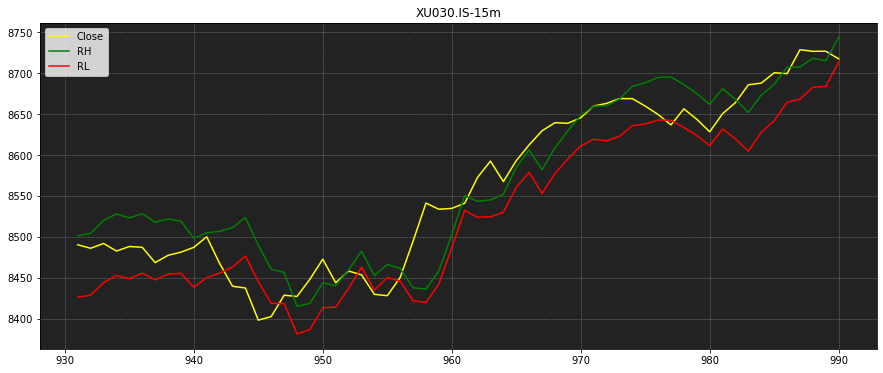

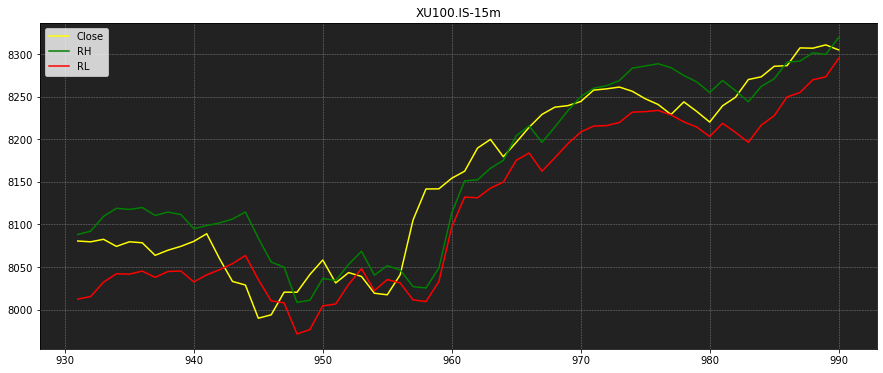

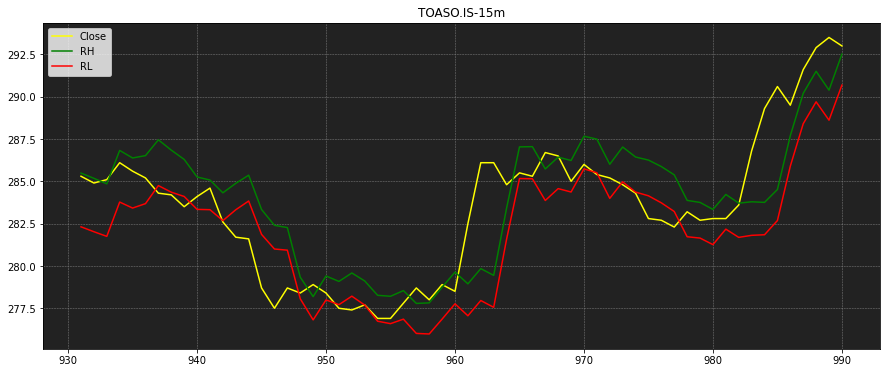

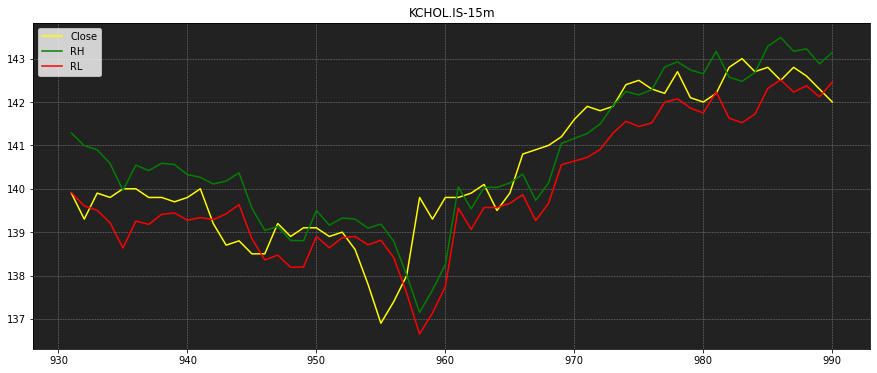

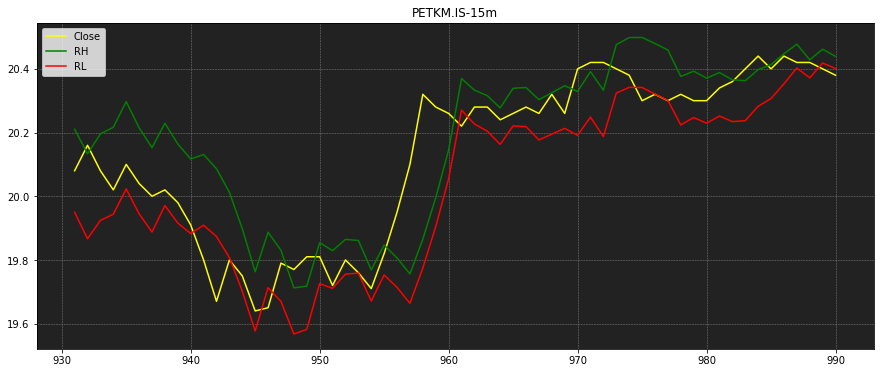

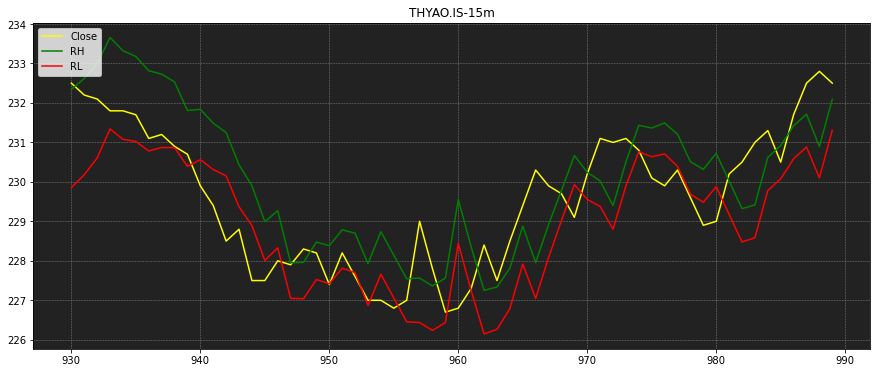

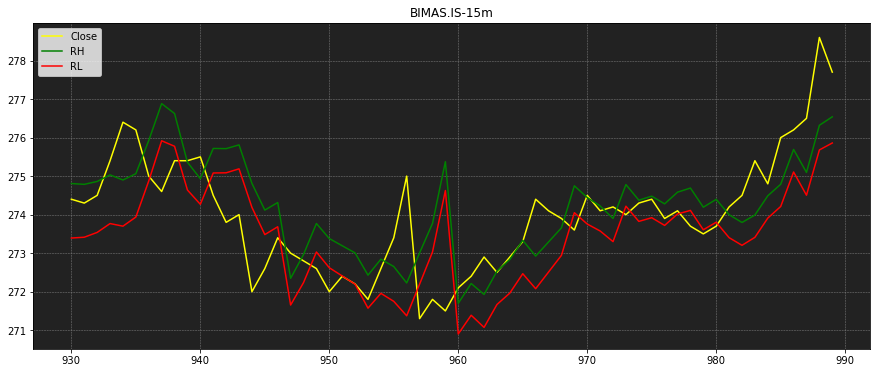

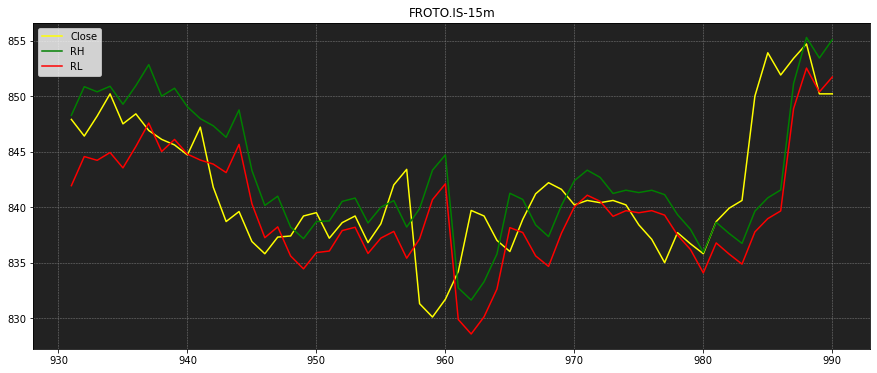

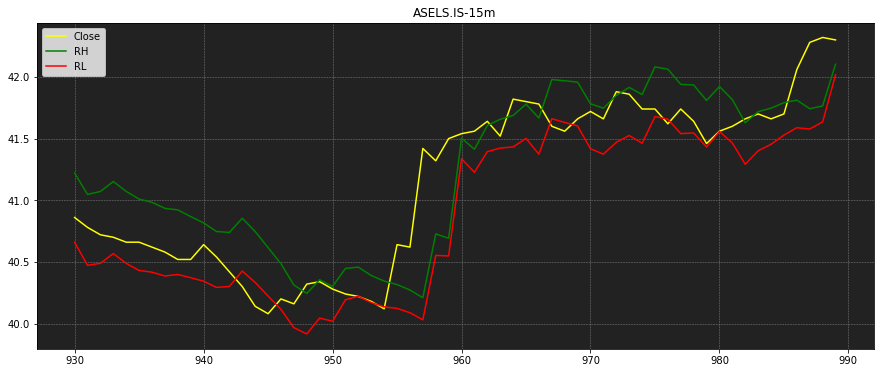

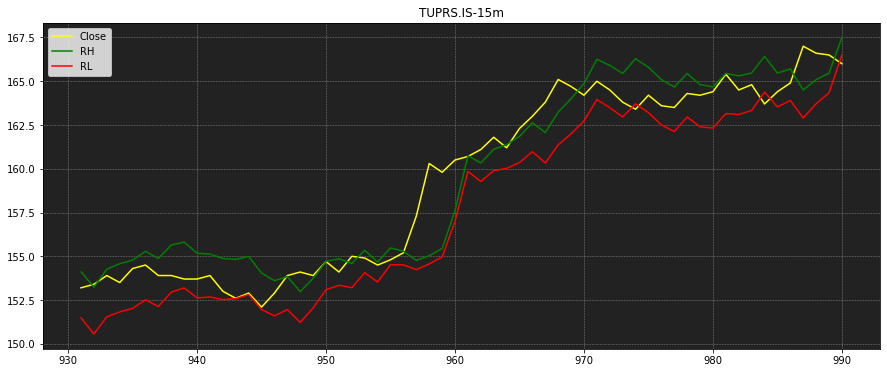

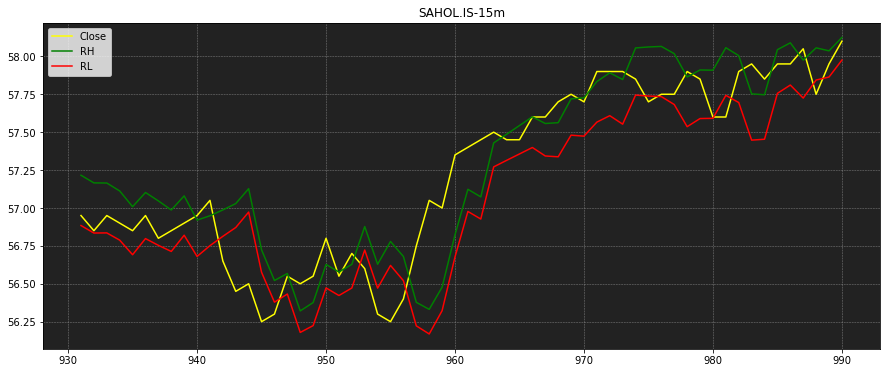

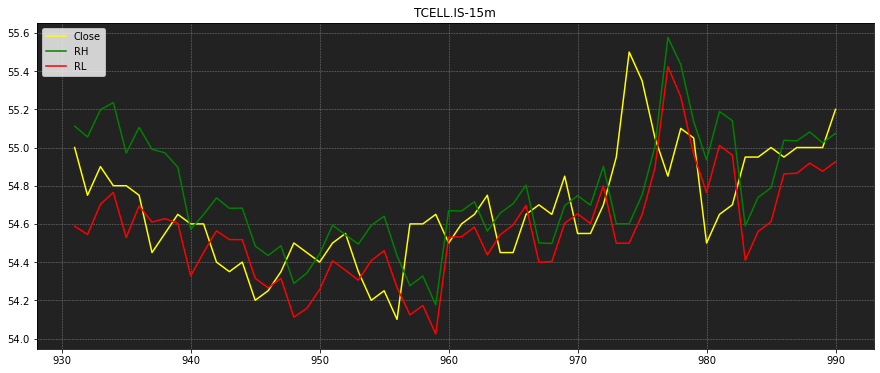

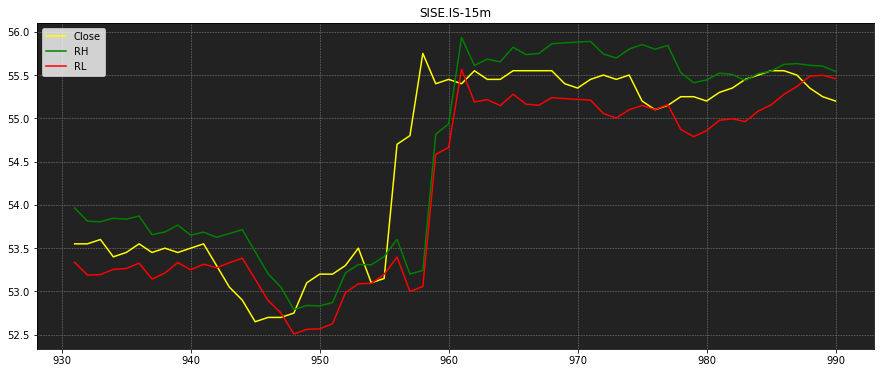

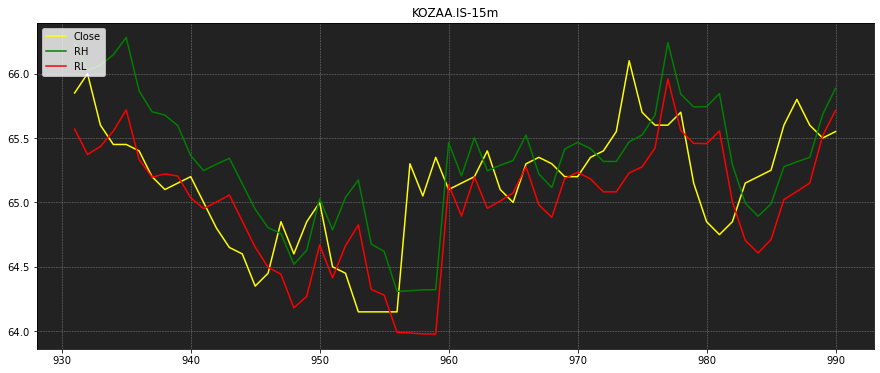

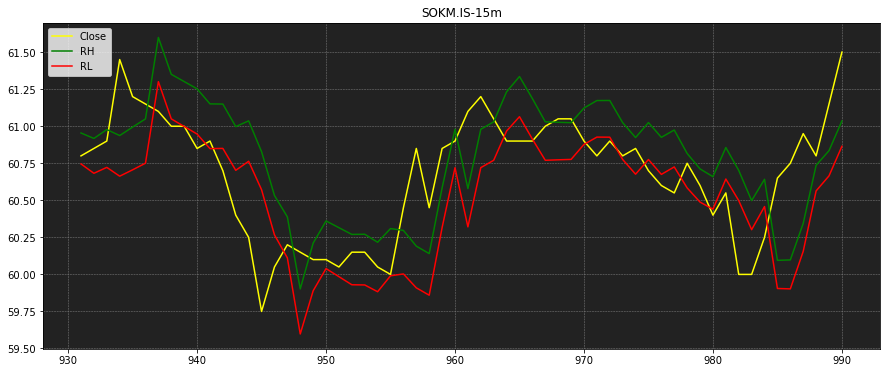

In [5]:
stc = ['XU030','XU100','TOASO','KCHOL','PETKM','THYAO','BIMAS','FROTO','ASELS','TUPRS','SAHOL','TCELL','SISE','KOZAA','SOKM']
stc = [x+'.IS' for x in stc]

t = {
    #'1d':'6mo',
    #'1h':'60d'
    '15m':'30d'
}

for s in stc:
    for v,k in t.items():
        print(s,k,v)
        calc(s,k,v)

# ------------------------------------------------------------------------------------------

In [ ]:
df=getData(tick,per,inter).reset_index().drop(columns=['Close']).rename(columns={'Adj Close':'Close'})

In [ ]:
df

In [ ]:
df['r_var']=df['Close'].rolling(30).var()

In [ ]:
df['Volatility']=np.sqrt(df['r_var'])

In [ ]:
df['Range']=np.sqrt(30/365)*df['Volatility']

In [ ]:
df['RH']=(df['Close']+df['Range']).shift(3)
df['RL']=(df['Close']-df['Range']).shift(3)

In [ ]:
df

In [ ]:
df[['Close','RH','RL']][-60:].plot(figsize=(15,6),title=f'{tick}-{inter}')